In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from utils import plot_prec_rec_curve, plot_roc_curve

In [3]:
import sys
sys.path.append('../')
from frameworks.CPLELearning import CPLELearningModel

In [4]:
import pandas as pd
import sklearn
from xgboost import XGBClassifier

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
DF_data = pd.read_csv("../data/creditcard.csv")
DF_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
y = DF_data['Class']
X = DF_data.drop(['Class', 'Time'], axis=1).values

In [7]:
from sklearn.model_selection import train_test_split


seed = 44
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=False)

In [8]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]

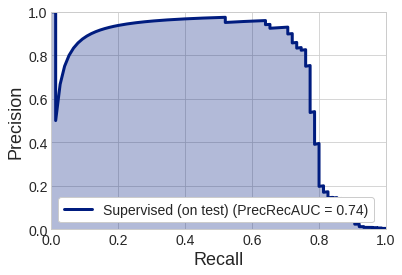

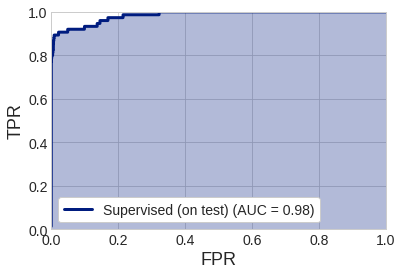

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from utils import plot_prec_rec_curve, plot_roc_curve


title = 'Supervised (on test)'

plot_prec_rec_curve(y_test, y_pred, title)
plt.show()
plt.clf()
plot_roc_curve(y_test, y_pred, title)

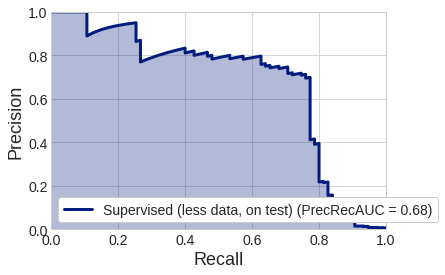

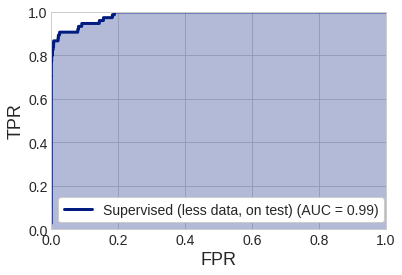

In [10]:
title = 'Supervised (less data, on test)'

unlab_frac = 0.5
X_train, X_unlab, y_train, y_unlab = train_test_split(X_train, y_train, test_size=unlab_frac, random_state=seed, shuffle=False)

model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]

plot_prec_rec_curve(y_test, y_pred, title)
plt.show()
plt.clf()
plot_roc_curve(y_test, y_pred, title)

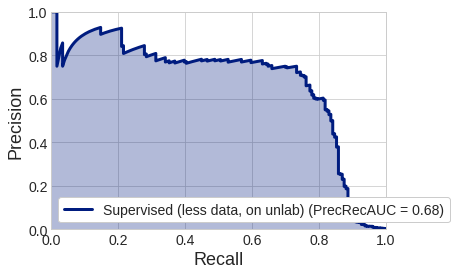

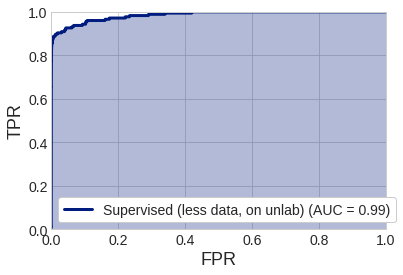

In [11]:
title = 'Supervised (less data, on unlab)'

y_unlab_pred = model.predict_proba(X_unlab)[:, 1]

plot_prec_rec_curve(y_unlab, y_unlab_pred, title)
plt.show()
plt.clf()
plot_roc_curve(y_unlab, y_unlab_pred, title)

In [12]:
%%time

X_combined = pd.np.r_[X_train, X_unlab]
y_combined = pd.np.r_[y_train, y_unlab.replace([0, 1], -1)]

model = CPLELearningModel(XGBClassifier(), predict_from_probabilities=True, max_iter=10, verbose=2)
model.fit(X_combined, y_combined.astype(int))

 max_iter exceeded.
number of non-one soft labels:  113923 , balance: 5  /  113923
current likelihood:  0.0013969436201003375
CPU times: user 27min 11s, sys: 3.84 s, total: 27min 15s
Wall time: 7min 43s


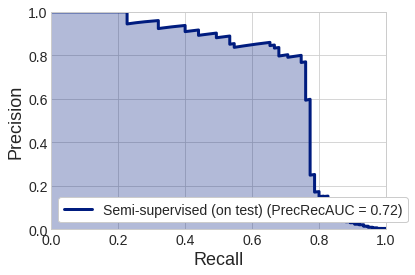

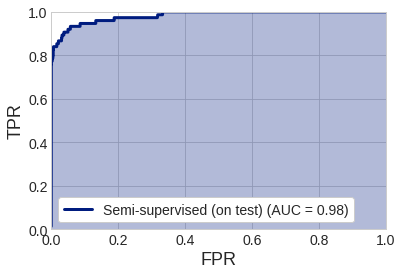

In [13]:
title = 'Semi-supervised (on test)'

y_pred = model.predict_proba(X_test)[:, 1]

plot_prec_rec_curve(y_test, y_pred, title)
plt.show()
plt.clf()
plot_roc_curve(y_test, y_pred, title)

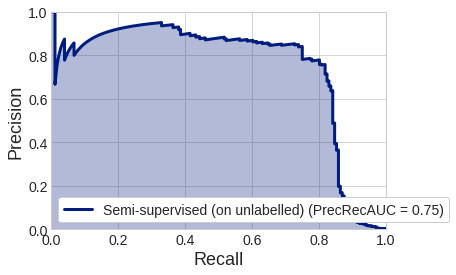

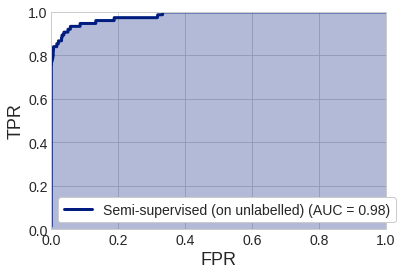

In [14]:
title = 'Semi-supervised (on unlabelled)'

y_unlab_pred = model.predict_proba(X_unlab)[:, 1]

plot_prec_rec_curve(y_unlab, y_unlab_pred, title)
plt.show()
plt.clf()
plot_roc_curve(y_test, y_pred, title)